In [16]:
# Cabecera
import matplotlib.pyplot as plt

import numpy as np

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler


En este ejercicio práctico trataremos de entender el Análisis de Componentes Principales (PCA), desde un punto de vista geométrico. Luego generaremos un clasificador basado en Análisis Discriminante Lineal de Fisher (LDA) que clasifique al conjunto de datos en el espacio de las primeras componentes principales. 

Utilizaremos la librería `sklearn` para obtener los algoritmos de PCA, LDA y de estandarización. Usaremos `matplotlib` para graficar y `numpy` para operar con arrays principalmente.

# Análisis de Componentes Principales (PCA)

Comencemos generando una base de datos aleatoria con cierta dispersión. Para generar número pseudo-aleatorios, podemos utilizar la librería `numpy`. Tener en cuenta que si se quiere *reproducibilidad*, se debe fijar una semilla. 

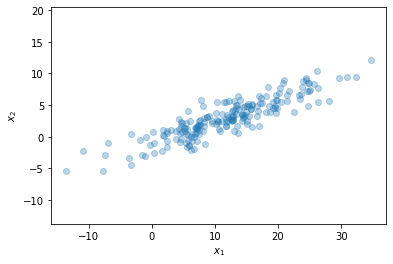

In [17]:
rng = np.random.RandomState(1) # fijamos semilla
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)*10+10).T # generamos datos aleatorios en 2D
x1 = X[:, 0] # definimos variable1
x2 = X[:, 1] # definimos variable2
plt.scatter(x1,x2, alpha=0.3) #graficamos x1 vs x2
plt.xlabel('$x_1$') # agregamos nombre al eje abscisas
plt.ylabel('$x_2$') # agregamos nombre al eje ordenadas
plt.axis('equal'); # definimos que el aspecto del gráfico sea igual para cada eje.

Luego, para realizar PCA con `sklearn` debemos instanciar la clase `PCA` con el número de componentes principales que queremos que guarde. Esta instanciación es la definición de un objeto, llamado *pca* en este caso, que es el algoritmo. Todavía no se ejecuta, hasta que no se utilice el método `fit` sobre los datos que se desee como se muestra a continuación:

In [19]:
pca = PCA(n_components=2) # instancio la clase PCA
pca.fit(X) # corro PCA sobre los datos X 

PCA(n_components=2)

Tener en cuenta que esta metodología de trabajo se repite siempre en el paquete `sklearn`. Primero definimos el algoritmo que utilizaremos y luego ajustamos y lo utilizamos.

Si queremos ver los pesos sobre de las componentes principales para cada variable, podemos usar el método `components_` de la clase PCA.

In [20]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


Vemos que la primera componente tiene la forma

$PC_1 = (-0.94446029) x_1 + (-0.32862557) x_2$

mientras que la segunda componente tiene la forma:

$PC_2 = (-0.32862557) x_1 + (0.94446029) x_2$.

Podemos obtener la proporción de la varianza explicada por cada componente principal con el método `explained_variance_ratio`:

In [21]:
print(pca.explained_variance_ratio_)

[0.97634101 0.02365899]


Vemos que la primera componente se lleva un 97.6% de la variabilidad total de los datos mientras que la segunda componente sólo un 2.4%.

Recordando las expresiones para las componentes principales que obtuvimos recién a partir de `pca.components_`, podemos graficar esos vectores escalados a la variabilidad que explican en el espacio de las dos variables aleatorias utilizadas. A continuación hay una función que hace esto (no hace falta entenderla del todo):

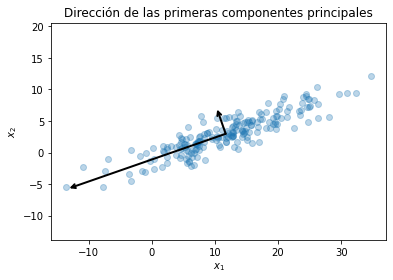

In [22]:
def draw_vector(v0, v1, ax=None):
    '''Función que dibuja los autovectores 
    obtenidos mediante PCA.'''
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# graficamos
plt.scatter(x1, x2, alpha=0.3)
for longitud, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(longitud)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')
plt.title('Dirección de las primeras componentes principales')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

Vemos que efectivamente, las direcciones de las componentes principales se orientan en las direcciones de máxima variabilidad de la nube de datos. ¿Se animan a indicar cuál es la componente principal número 1?

## Estandarización

Muchas veces nos enfrentamos con bases de datos cuyas variables se miden en distintas unidades. Puede que midamos la altura de las personas de la base de datos en centímetros (valores rondando 170cm) y a la vez la longitud del brazo en metros (valores rondando 1m). Como el desvío estándar se mide en las mismas unidades que la variable, una unidad de desvío estándar para la altura no nos dice la misma información que una unidad de desvío estándar para la longitud del brazo. Esto puede llegar a ser un problema a la hora de utilizar PCA, ya que las escalas de las variables pueden ser muy distintas y por lo tanto pueden gobernar la forma de la nube de datos. Las componentes principales se alinearán entonces a los ejes de las variables con mayor rango de escala, que a lo mejor no son las variables de mayor variabilidad respecto a su valor medio. Es por esto que se suelen estandarizar los datos previo a implementar el PCA.   

En el código a continuación, utilizaremos la clase `StandardScaler` para estandarizar los datos que están en $X$. A los datos estandarizados los guardaremos en la variable $Xstd$. Luego graficamos los datos sin estandarizar y estandarizados para comparar.

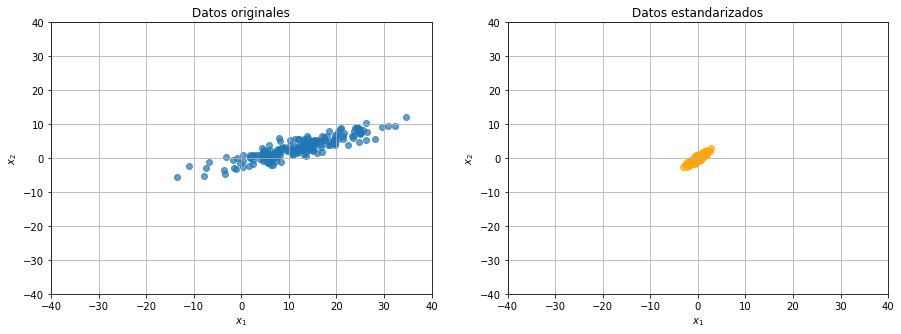

In [23]:
scaler = StandardScaler() # definimos el escaleo
Xstd = scaler.fit_transform(X) # restamos medias y dividimos por desvíos.

plt.figure(figsize=(15,5)) #inicializamos gráfico
plt.subplot(1,2,1) # inicializamos el primer subgráfico
plt.title('Datos originales') #agregamos título
plt.scatter(x1, x2, alpha=0.7) # generamos el gráfico de dispersión x1 vs x2
plt.ylim(-40,40) # fijamos los límites del eje ordenado
plt.xlim(-40,40) # fijamos los límites del eje de las abscisas
lim_x, lim_y = plt.xlim(), plt.ylim() #guardo los límites
plt.xlabel('$x_1$') # definimos la leyenda del eje x
plt.ylabel('$x_2$') # definimos la leyenda del eje y
plt.grid() # agregamos la grilla al gráfico
plt.subplot(1,2,2) # inicializamos el segundo gráfico
plt.title('Datos estandarizados') #agregamos título
plt.scatter(Xstd[:, 0], Xstd[:, 1], c='orange', alpha=0.7) # generamos gráfico de dispersión
plt.ylim(lim_y) # fijamos los límites del eje ordenado
plt.xlim(lim_x) # fijamos los límites del eje de las abscisas
plt.xlabel('$x_1$') # definimos la leyenda del eje x
plt.ylabel('$x_2$') # definimos la leyenda del eje y
plt.grid() # agregamos la grilla al gráfico
plt.show() #mostramos el gráfico

Del la figura anterior, podemos ver que al estandarizar los datos, lo que hacemos es centrar la nube de datos en el origen de coordenadas, además de corregir cada variable por su desvío estándar. Recordar que la estandarización es una transformación aplicada a los datos, por lo tanto modifica la forma de la nube de datos (la dispersión).

Una vez obtenidas las componentes principales, podemos "pararnos" en el sistema de referencia de las componentes principales. Esto es equivalente a generar una traslación de los datos al centro de la nube de datos y luego una *rotación* de la nube, a modo que quede alineada la componente principal 1 con el eje $x$. Esto lo podemos ver mejor con el siguiente gráfico:

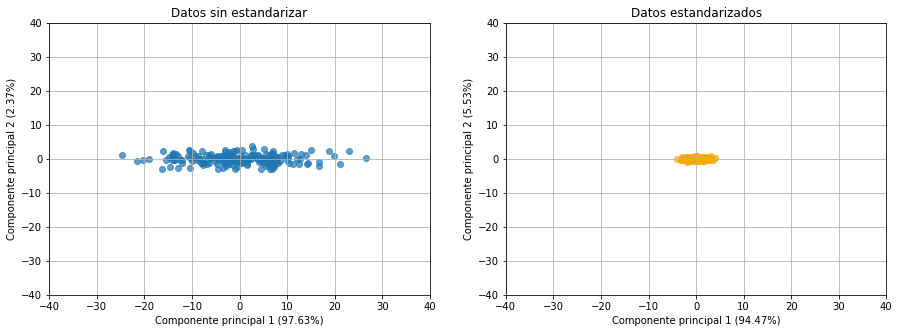

In [24]:
# Aplicamos PCA a datos con y sin estandarización
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X)
pca_std = PCA(n_components=2)
x_pca_std = pca_std.fit_transform(Xstd)

#graficamos
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Datos sin estandarizar')
plt.scatter(x_pca[:, 0], x_pca[:, 1], alpha=0.7)
plt.xlabel(f'Componente principal 1 ({pca.explained_variance_ratio_[0] * 100:.2f}%)')
plt.ylabel(f'Componente principal 2 ({pca.explained_variance_ratio_[1] * 100:.2f}%)')
plt.xlim(lim_x)
plt.ylim(lim_y)
plt.grid()
plt.subplot(1,2,2)
plt.title('Datos estandarizados')
plt.scatter(x_pca_std[:, 0], x_pca_std[:, 1], c='orange', alpha=0.7)
plt.xlabel(f'Componente principal 1 ({pca_std.explained_variance_ratio_[0] * 100:.2f}%)')
plt.ylabel(f'Componente principal 2 ({pca_std.explained_variance_ratio_[1] * 100:.2f}%)')
plt.xlim(lim_x)
plt.ylim(lim_y)
plt.grid()
plt.show()

## Reducción de dimensión

El PCA o ACP suele utilizarse como método de reducción de dimensionalidad. Como las componentes principales se ordenan de mayor a menor variabilidad explicada, entonces las primeras componentes suelen ser las más explicativas. Como las componentes principales son ortogonales (los vectores direccionales que vimos antes forman ángulo de 90 grados entre sí), entonces la variabilidad explicada por una componente sólo es explicada por esa componente. Por ende, si la información que nos interesa se encuentra explicada por una componente en particular, o por un subconjunto de componentes principales, entonces podemos quedarnos con esas componentes únicamente y así reducir la dimensión del conjunto de datos. 

Podemos entender esto mejor a partir del ejemplo que muestro a continuación. Vamos a quedarnos sólamente con la variabilidad explicada por la primera componente principal:

Tamaño original:    (200, 2)
Tamaño transformado: (200, 1)


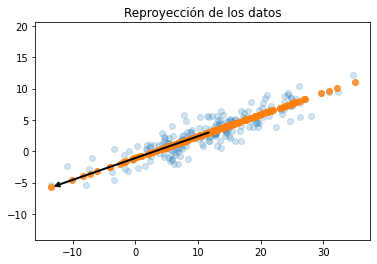

In [25]:
# Aplicamos PCA a los datos sin estandarizar y nos quedamos con una componente.
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("Tamaño original:   ", X.shape)
print("Tamaño transformado:", X_pca.shape)

# Reproyectamos los datos con la información de la componente 1 al espacio original.
X_new = pca.inverse_transform(X_pca)
plt.scatter(x1, x2, alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)

# dibujamos el vector de dirección de la componente 1
v= pca.components_[0] * 3 * np.sqrt(pca.explained_variance_[0])
draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')
plt.title('Reproyección de los datos')
plt.show() # mostramos el gráfico

# Clasificadores

En las clases teóricas vieron tres tipos de clasificadores:

- Análisis Discriminante Lineal

- Análisis Discriminante Cuadrático

- Clasificación Bayesiana (Naives Bayes)

La idea no es entender cómo están funcionando estos clasificadores (esto lo vieron en el teórico) sino que les voy a mostrar cómo pueden usar los tres clasificadores para clasificar datos de una base de datos de *juguete*. A continuación armamos esta base de datos, en donde vamos a poner dos conjuntos de datos *disjuntos*.

(200, 2)


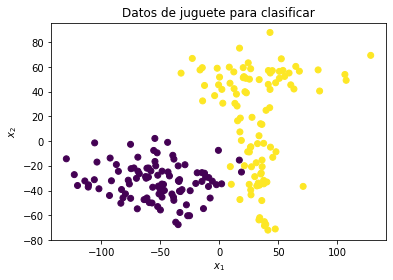

In [26]:
np.random.seed(2)
x1b = np.concatenate([np.random.normal(-50,30,100), np.random.normal(30,30,50), np.random.normal(30,10,50)])
x2b = np.concatenate([np.random.normal(-30,15,100), np.random.normal(50,12,50), np.random.normal(-30,30,50)])
y = [0 for i in range(100)] + [1 for i in range(100)]
X_class = np.vstack([x1b,x2b]).T
print(X_class.shape)

plt.figure()
plt.scatter(x1b, x2b, c=y)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Datos de juguete para clasificar')
plt.show()

A continuación instancio los distintos clasificadores, entreno el clasificador con los datos y luego grafico. Esto lo hacemos para los tres clasificadores propuestos. Fijense que la simpleza de `sklearn` hace que el código para hacer todo esto sea el **mismo** en los tres casos y sólamente sea necesario cambiar el clasificador elegido.

## Análisis Discriminante Lineal (LDA)

La función de medida de distancia tiene la forma: $a' x + c$

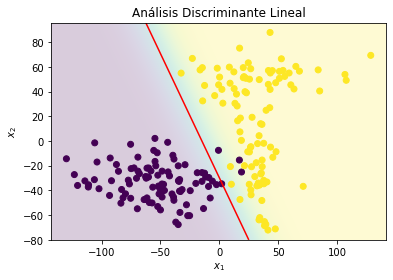

In [34]:
LDA = LinearDiscriminantAnalysis()
discriminante = LDA.fit(X_class, y)

plt.figure()
plt.scatter(x1b, x2b, c=y)

x1_min, x1_max = plt.xlim()
x2_min, x2_max = plt.ylim()

h=0.1
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

Z1 = LDA.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z1 = Z1[:, 1].reshape(xx.shape)

plt.pcolormesh(xx, yy, Z1, zorder=0, alpha=0.2, shading='auto')
plt.contour(xx, yy, Z1, [0.5], colors='red')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Análisis Discriminante Lineal')
plt.show()


## Análisis Discriminante Cuadrático

La función de medida de distancia tiene la forma: $x' A x + b' x + c$

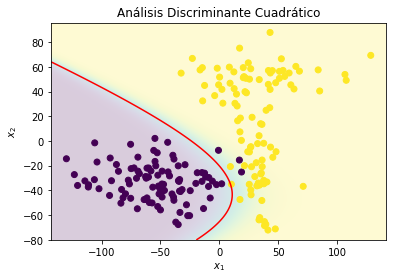

In [33]:
QDA = QuadraticDiscriminantAnalysis()
discriminante = QDA.fit(X_class, y)

plt.figure()
plt.scatter(x1b, x2b, c=y)

x1_min, x1_max = plt.xlim()
x2_min, x2_max = plt.ylim()

h=0.1
xx2, yy2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

Z2 = QDA.predict_proba(np.c_[xx2.ravel(), yy2.ravel()])
Z2 = Z2[:, 1].reshape(xx2.shape)

plt.pcolormesh(xx2, yy2, Z2, zorder=0, alpha=0.2, shading='auto')
plt.contour(xx2, yy2, Z2, [0.5], colors='red')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Análisis Discriminante Cuadrático')
plt.show()


## Clasificación bayesiana gaussiana (Gaussian Naive Bayes)

La función de medida está basada en las clase que maximiza la probabilidad conjunta pensada como producto de las probabilidades 

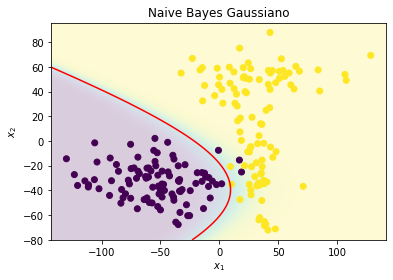

In [32]:
NB = GaussianNB()
discriminante = NB.fit(X_class, y)

plt.figure()
plt.scatter(x1b, x2b, c=y)

x1_min, x1_max = plt.xlim()
x2_min, x2_max = plt.ylim()

h=0.1
xx3, yy3 = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

Z3 = NB.predict_proba(np.c_[xx3.ravel(), yy3.ravel()])
Z3 = Z3[:, 1].reshape(xx3.shape)

plt.pcolormesh(xx3, yy3, Z3, zorder=0, alpha=0.2, shading='auto')
plt.contour(xx3, yy3, Z3, [0.5], colors='red')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Naive Bayes Gaussiano')
plt.show()


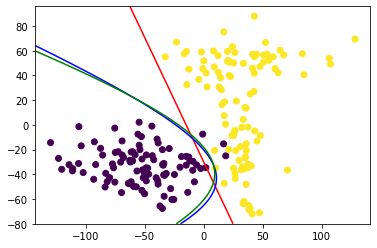

In [37]:
plt.figure()
plt.scatter(x1b, x2b, c=y)

x1_min, x1_max = plt.xlim()
x2_min, x2_max = plt.ylim()

plt.contour(xx, yy, Z1, [0.5], colors='red')
plt.contour(xx2, yy2, Z2, [0.5], colors='blue')
plt.contour(xx3, yy3, Z3, [0.5], colors='green')

# Recursos útiles y Bibliografía

- [Python Data Science book](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)
- [PCA explicado visualmente (Recomendado mirar!)](https://setosa.io/ev/)